# QOM dataset descriptivo

## Imports

In [3]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dfply import *
import dataPaths

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)

Populating the interactive namespace from numpy and matplotlib


/home/leandro/apps/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean', 'flatten', 'select', 'cumprod', 'median', 'sample', 'reshape', 'cumsum', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Process

In [4]:
#%% Get durations QOM
import os

idiomas = [ "qom", "spa", "und" ]
df = pd.DataFrame( columns = ["path", "lang", "duration", "isChild"] )

for path in dataPaths.QOM:
#for path in [ dataPaths.QOM[4], dataPaths.QOM[6] ]: #estos son los agregados en febrero (hechos en diciembre)
    for idioma in idiomas:
        finalDir = os.path.join( path, idioma ) + "/"
        if os.path.isdir( finalDir ):
            files = utils.findMusic( finalDir, "wav" )
            durs = utils.getDurations( files )
            
            for i in range(0, len(files)):
                isChild = None
                filename = os.path.basename( files[i] )

                speaker = "UNK"
                if not filename[0].isdigit():
                    speaker = filename[0:3]
                    if filename[0:2] == "CH":
                        isChild = True
                    else :
                        isChild = False
                
                
                df = df.append({
                    "path" : files[i],
                    "lang" : idioma,
                    "duration" : durs[i],
                    "isChild" : isChild,
                    "speaker" : speaker
                }, ignore_index=True)            
        else:
            break

........................................................................................................................................................................................................
[ 200 / 298 ]
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

## Duraciones generales

**14/02/2019**

|_              | Qom | Español | Indeterminado | Total |
|---------------|-----|---------|---------------|-------|
|Minutos totales|25.7|13.6|9.8|49.2|
|Segundos medios|1.5|1.3|1.8|1.5|


**08/10/2019**

|_              | Qom | Español | Total | Indeterminado | Total |
|---------------|-----|---------|-------|---------------|-------|
|Minutos totales|38.1 |17.0     |55.1   |24.8           |79.9   |
|Segundos medios|1.7  |1.4      |1.5    |2.0            |1.7    |


In [5]:
totQOM = df[df.lang=="qom"].duration.sum()/60
totSPA = df[df.lang=="spa"].duration.sum()/60
totUND = df[df.lang=="und"].duration.sum()/60

meanQOM = df[df.lang=="qom"].duration.mean()
meanSPA = df[df.lang=="spa"].duration.mean()
meanUND = df[df.lang=="und"].duration.mean()

print("totQOM", totQOM)
print("totSPA", totSPA)
print("totUND", totUND)
print("")
print("totQOM+SPA", totQOM+totSPA)
print("totQOM+SPA+UND", totQOM+totSPA+totUND)
print("")
print("meanQOM", meanQOM)
print("meanSPA", meanSPA)
print("meanUND", meanUND)
print("")
print("meanQOM+SPA", (meanQOM+meanSPA)/2)
print("meanQOM+SPA+UND", (meanQOM+meanSPA+meanUND)/3)



totQOM 38.09135092828798
totSPA 17.011416817838246
totUND 24.776319803476945

totQOM+SPA 55.102767746126226
totQOM+SPA+UND 79.87908754960317

meanQOM 1.6755726214789435
meanSPA 1.4215668650004119
meanUND 2.082043680964448

meanQOM+SPA 1.5485697432396777
meanQOM+SPA+UND 1.7263943891479343


## Cómo se distribuyen las duraciones

El 80% de las emisiones QOM tienen entre 0.52 y 3.0916893424036287 segundos
El 80% de las emisiones SPA tienen entre 0.45628571428571435 y 2.6699002267573695 segundos


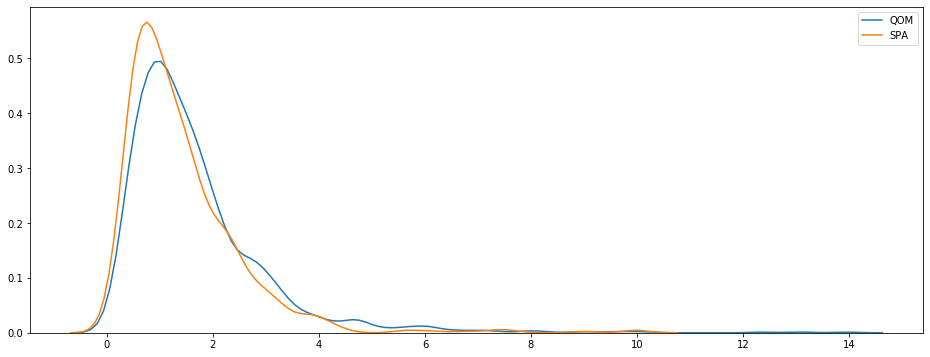

In [9]:
sns.kdeplot( df[ df["lang"] == "qom"]["duration"], label="QOM" )
sns.kdeplot( df[ df["lang"] == "spa"]["duration"], label="SPA" )

qomIntervalo_1 = np.quantile(df[ df["lang"] == "qom"]["duration"], 0.10)
qomIntervalo_2 = np.quantile(df[ df["lang"] == "qom"]["duration"], 0.90)
print("El 80% de las emisiones QOM tienen entre {} y {} segundos".format(qomIntervalo_1, qomIntervalo_2))

spaIntervalo_1 = np.quantile(df[ df["lang"] == "spa"]["duration"], 0.10)
spaIntervalo_2 = np.quantile(df[ df["lang"] == "spa"]["duration"], 0.90)
print("El 80% de las emisiones SPA tienen entre {} y {} segundos".format(spaIntervalo_1, spaIntervalo_2))

## Quiénes hablan

In [73]:
df["speakerAgg"] = df.speaker
df.loc[df.speaker.str[0:2] == "CH", "speakerAgg"] = "Niñe"
df.loc[df.speaker.str[0:2] == "AD", "speakerAgg"] = "Adulte"
df.loc[df.speaker.str[0:2] == "HO", "speakerAgg"] = "Hombre"
df.loc[df.speaker.str[0] == "M", "speakerAgg"] = "Mujer"

df.loc[df.speaker.isin(["PAP","FAC"]), "speakerAgg"] = "Hombre" #FAC = "Facundo"
df.loc[df.speaker.isin(["TIA", "ABA", "NIL", "BRE"]), "speakerAgg"] = "Mujer" #NIL = Nilda BRE = Aunt
df.loc[df.speaker.isin(["AUY"]), "speakerAgg"] = "Niñe" #Auy = Auyi

### Sin Agrupar

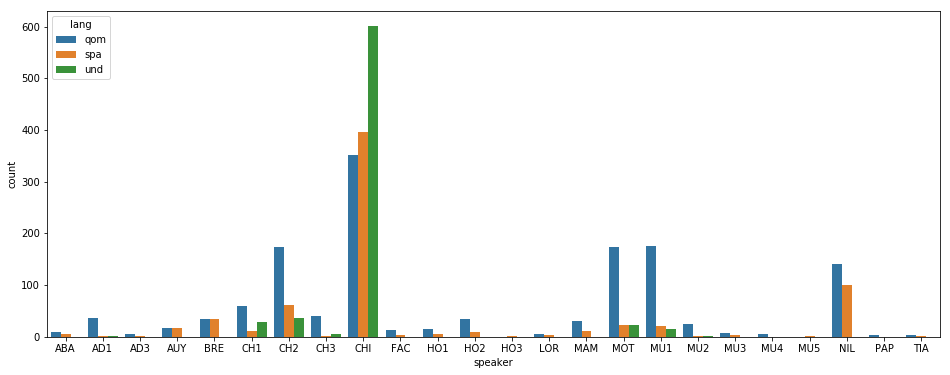

In [75]:
dfHablanViz = df >> group_by("speaker","lang") >> summarize(count=X.speaker.count())
sns.barplot(x="speaker",y="count",hue="lang",data=dfHablanViz)

### Agrupando

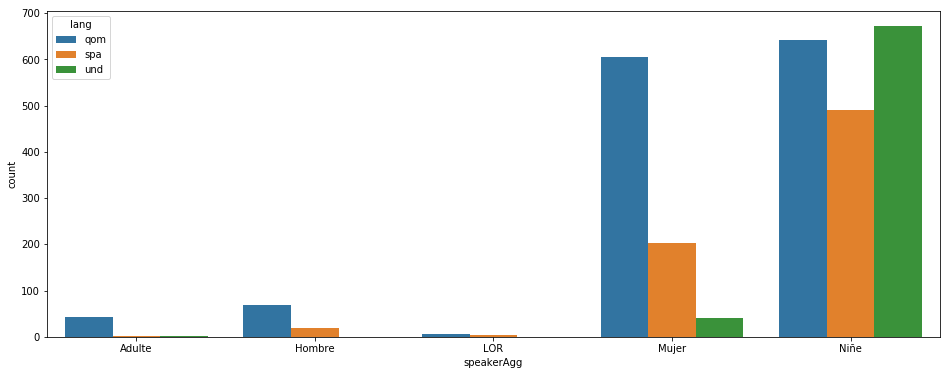

In [74]:
dfHablanViz = df >> group_by("speakerAgg","lang") >> summarize(count=X.speaker.count())
sns.barplot(x="speakerAgg",y="count",hue="lang",data=dfHablanViz)